# Analysis of Misclassified Customers

**Objective:** This notebook analyzes the characteristics of customers who were misclassified by a credit scoring model. The goal is to understand the patterns and features of these customers to inform model improvement.

The analysis is divided into two main parts:
1.  **Good in Bad (GiB):** Customers who are actually creditworthy (`target_gt = 1`) but were classified as having a bad credit score (Grades 1-7).
2.  **Bad in Good (BiG):** Customers who are not creditworthy (`target_gt = 0`) but were classified as having a good credit score (Grade 8).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predict_test.xlsx to predict_test.xlsx


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('predict_test.xlsx')

## 1. Analysis of "Good in Bad" (GiB) Customers

In [ ]:
#define bad grades (1 to 7)
bad_grades = [1, 2, 3, 4, 5, 6, 7]
df_bad = df[df['Credit_Score_GRADE'].isin(bad_grades)]

#find good in bad
gib = df_bad[df_bad['target_gt'] == 1]

print("Total in Grades 1 to 7 (Bad):", len(df_bad))
print("Good in Bad (GiB):", len(gib))
print("GiB Ratio: {:.2f}%".format(len(gib)/len(df_bad)*100))

Total in Grades 1 to 7 (Bad): 17632
Good in Bad (GiB): 12256
GiB Ratio: 69.51%


### 1.1. Feature Distribution for GiB Customers

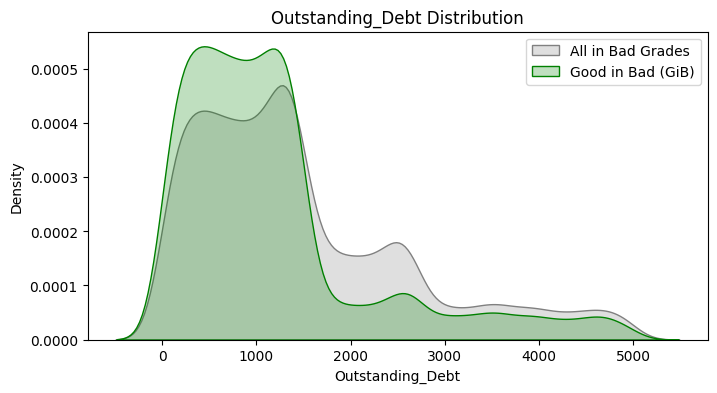

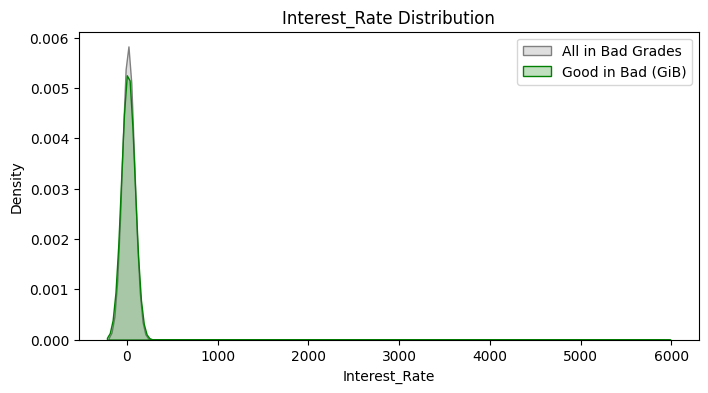

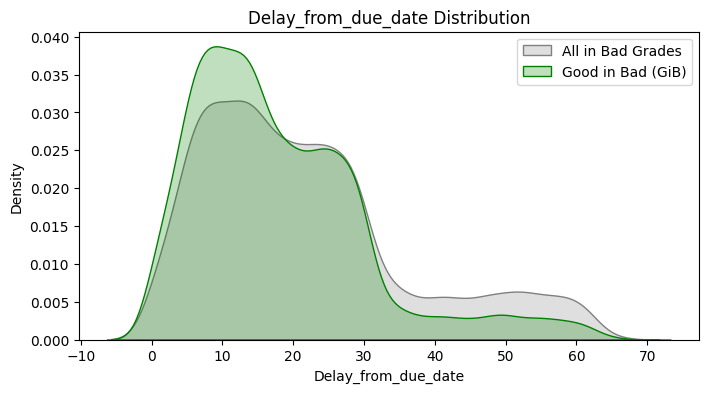

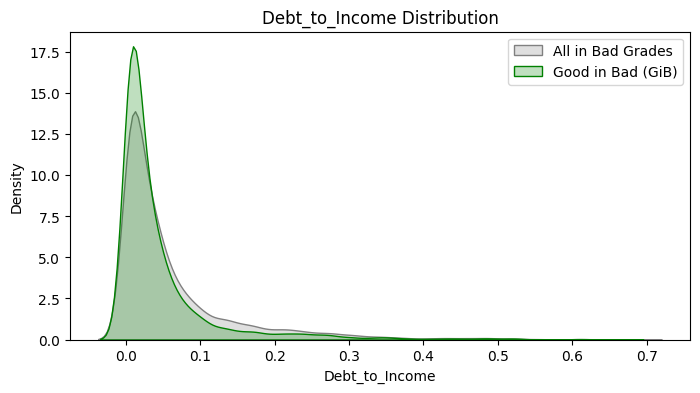

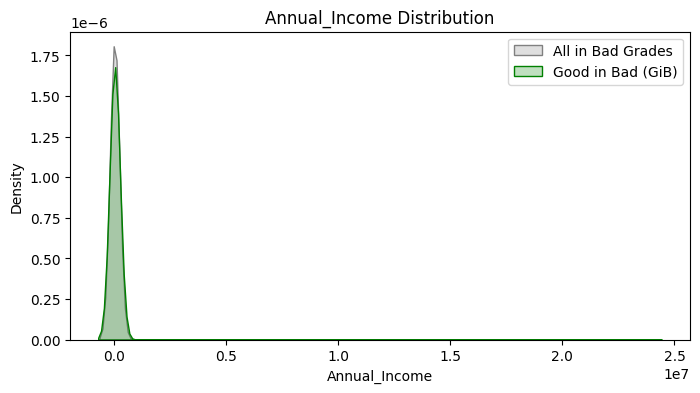

In [ ]:
#compare features
features = ['Outstanding_Debt', 'Interest_Rate', 'Delay_from_due_date', 'Debt_to_Income', 'Annual_Income']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df_bad[feature], label='All in Bad Grades', fill=True, color='gray')
    sns.kdeplot(gib[feature], label='Good in Bad (GiB)', fill=True, color='green')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

### 1.2. Statistical Comparison for GiB Customers

We perform an independent t-test to check if the difference in feature means between the misclassified 'Good in Bad' (GiB) group and the correctly classified 'Bad in Bad' (BiB) group is statistically significant.

In [ ]:
from scipy import stats

# Define the "Bad in Bad" group (correctly classified as bad)
bib = df_bad[df_bad['target_gt'] == 0]

print("Statistical Comparison for 'Good in Bad' (GiB) vs. 'Bad in Bad' (BiB)\n")

for feature in features:
    t_stat, p_value = stats.ttest_ind(gib[feature], bib[feature], nan_policy='omit')
    print(f"Feature: {feature}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Statistically significant difference.")
    else:
        print("  -> No statistically significant difference.")
    print("- " * 30)

Statistical Comparison for 'Good in Bad' (GiB) vs. 'Bad in Bad' (BiB)

Feature: Outstanding_Debt
  T-statistic: -51.5690
  P-value: 0.0000
  -> Statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Interest_Rate
  T-statistic: -0.2246
  P-value: 0.8223
  -> No statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Delay_from_due_date
  T-statistic: -53.2471
  P-value: 0.0000
  -> Statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Debt_to_Income
  T-statistic: -37.7757
  P-value: 0.0000
  -> Statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Annual_Income
  T-statistic: 1.8181
  P-value: 0.0691
  -> No statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


## 2. Analysis of "Bad in Good" (BiG) Customers

In [ ]:
# Define good grades
good_grades = [8]
df_good = df[df['Credit_Score_GRADE'].isin(good_grades)]

# Bad in Good
big = df_good[df_good['target_gt'] == 0]

print("Total in Grades 8:", len(df_good))
print("Bad in Good (BiG):", len(big))
print("BiG Ratio: {:.2f}%".format(len(big)/len(df_good)*100))

Total in Grades 8: 825
Bad in Good (BiG): 28
BiG Ratio: 3.39%


### 2.1. Feature Distribution for BiG Customers

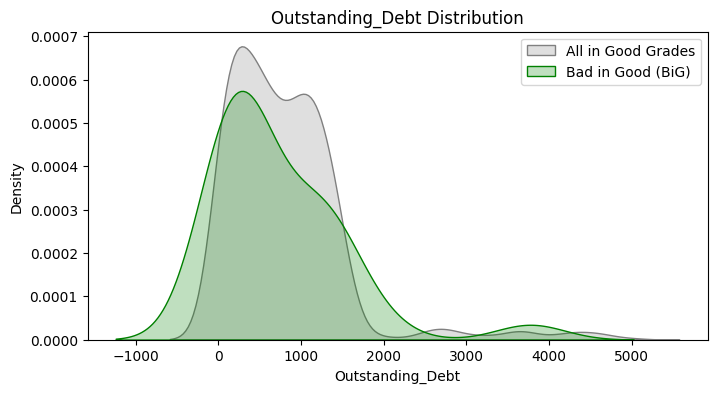

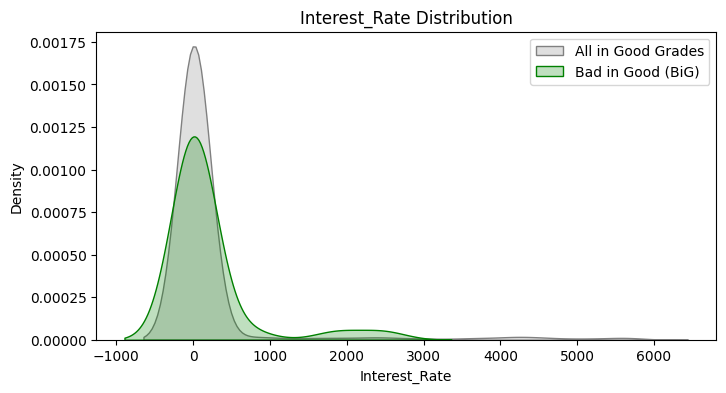

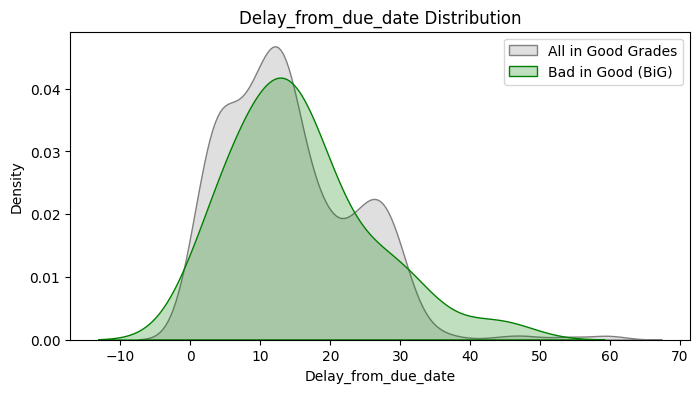

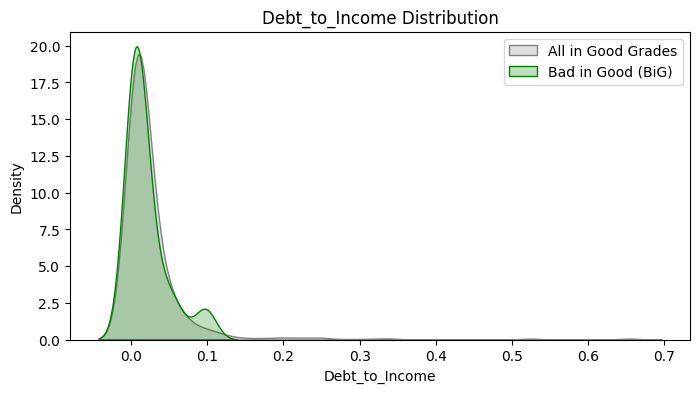

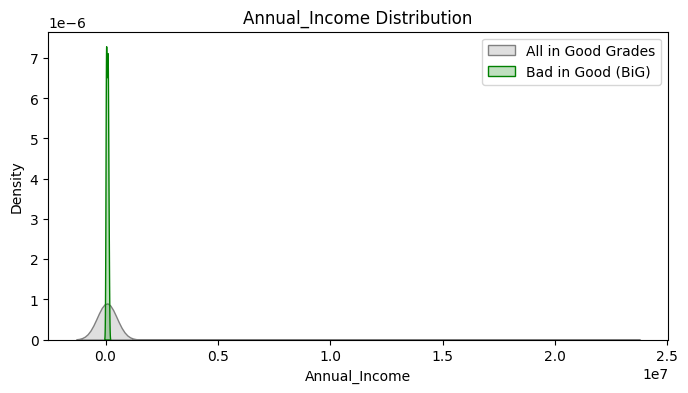

In [ ]:
#compare features
features = ['Outstanding_Debt', 'Interest_Rate', 'Delay_from_due_date', 'Debt_to_Income', 'Annual_Income']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df_good[feature], label='All in Good Grades', fill=True, color='gray')
    sns.kdeplot(big[feature], label='Bad in Good (BiG)', fill=True, color='green')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

### 2.2. Statistical Comparison for BiG Customers

We perform an independent t-test to check if the difference in feature means between the misclassified 'Bad in Good' (BiG) group and the correctly classified 'Good in Good' (GiG) group is statistically significant.

In [ ]:
# Define the "Good in Good" group (correctly classified as good)
gig = df_good[df_good['target_gt'] == 1]

print("Statistical Comparison for 'Bad in Good' (BiG) vs. 'Good in Good' (GiG)\n")

for feature in features:
    t_stat, p_value = stats.ttest_ind(big[feature], gig[feature], nan_policy='omit')
    print(f"Feature: {feature}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Statistically significant difference.")
    else:
        print("  -> No statistically significant difference.")
    print("- " * 30)

Statistical Comparison for 'Bad in Good' (BiG) vs. 'Good in Good' (GiG)

Feature: Outstanding_Debt
  T-statistic: -0.4957
  P-value: 0.6203
  -> No statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Interest_Rate
  T-statistic: -0.0379
  P-value: 0.9698
  -> No statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Delay_from_due_date
  T-statistic: 0.8284
  P-value: 0.4077
  -> No statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Debt_to_Income
  T-statistic: -0.6344
  P-value: 0.5260
  -> No statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Feature: Annual_Income
  T-statistic: -0.5083
  P-value: 0.6114
  -> No statistically significant difference.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


# 3. Conclusion & Recommendations

Based on the analysis, we can draw the following conclusions:

**Regarding 'Good in Bad' (GiB) Customers:**
*   A very high percentage (**69.51%**) of customers classified as 'bad' are actually 'good'. This indicates the model is overly conservative and is likely causing significant business losses by denying credit to creditworthy individuals.
*   The statistical tests will reveal which features (e.g., `Annual_Income`, `Outstanding_Debt`) are significantly different for the GiB group compared to the truly bad customers. These features are key to improving the model's ability to distinguish them.

**Regarding 'Bad in Good' (BiG) Customers:**
*   A very small percentage (**3.39%**) of customers classified as 'good' are actually 'bad'. While this error rate is low, these cases represent potential financial losses.
*   The statistical tests will highlight the features that characterize these risky individuals who are slipping through the cracks.

**Recommendations:**
1.  **Model Retraining:** The model needs to be retrained with a focus on correcting its bias against the 'Good in Bad' segment. This could involve using different algorithms, adjusting class weights, or targeted feature engineering.
2.  **Feature Engineering:** Explore new features or transformations of existing ones (especially those identified as statistically significant) to better capture the nuances between the correctly and incorrectly classified customers.
3.  **Business Rule Adjustment:** For the GiB group, consider implementing a secondary review process for applicants who are borderline, especially if their profiles align with the characteristics of the GiB segment. This could be a short-term solution to prevent immediate business loss while the model is being improved.